# Data Collection and Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load The Dataset

In [3]:
data = pd.read_csv("dataset.csv")

In [5]:
data.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


The datatype for the dataset.csv: 8 numerical / 10 categorial

#### Get the info for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

Total 2100 samples

In [9]:
data.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


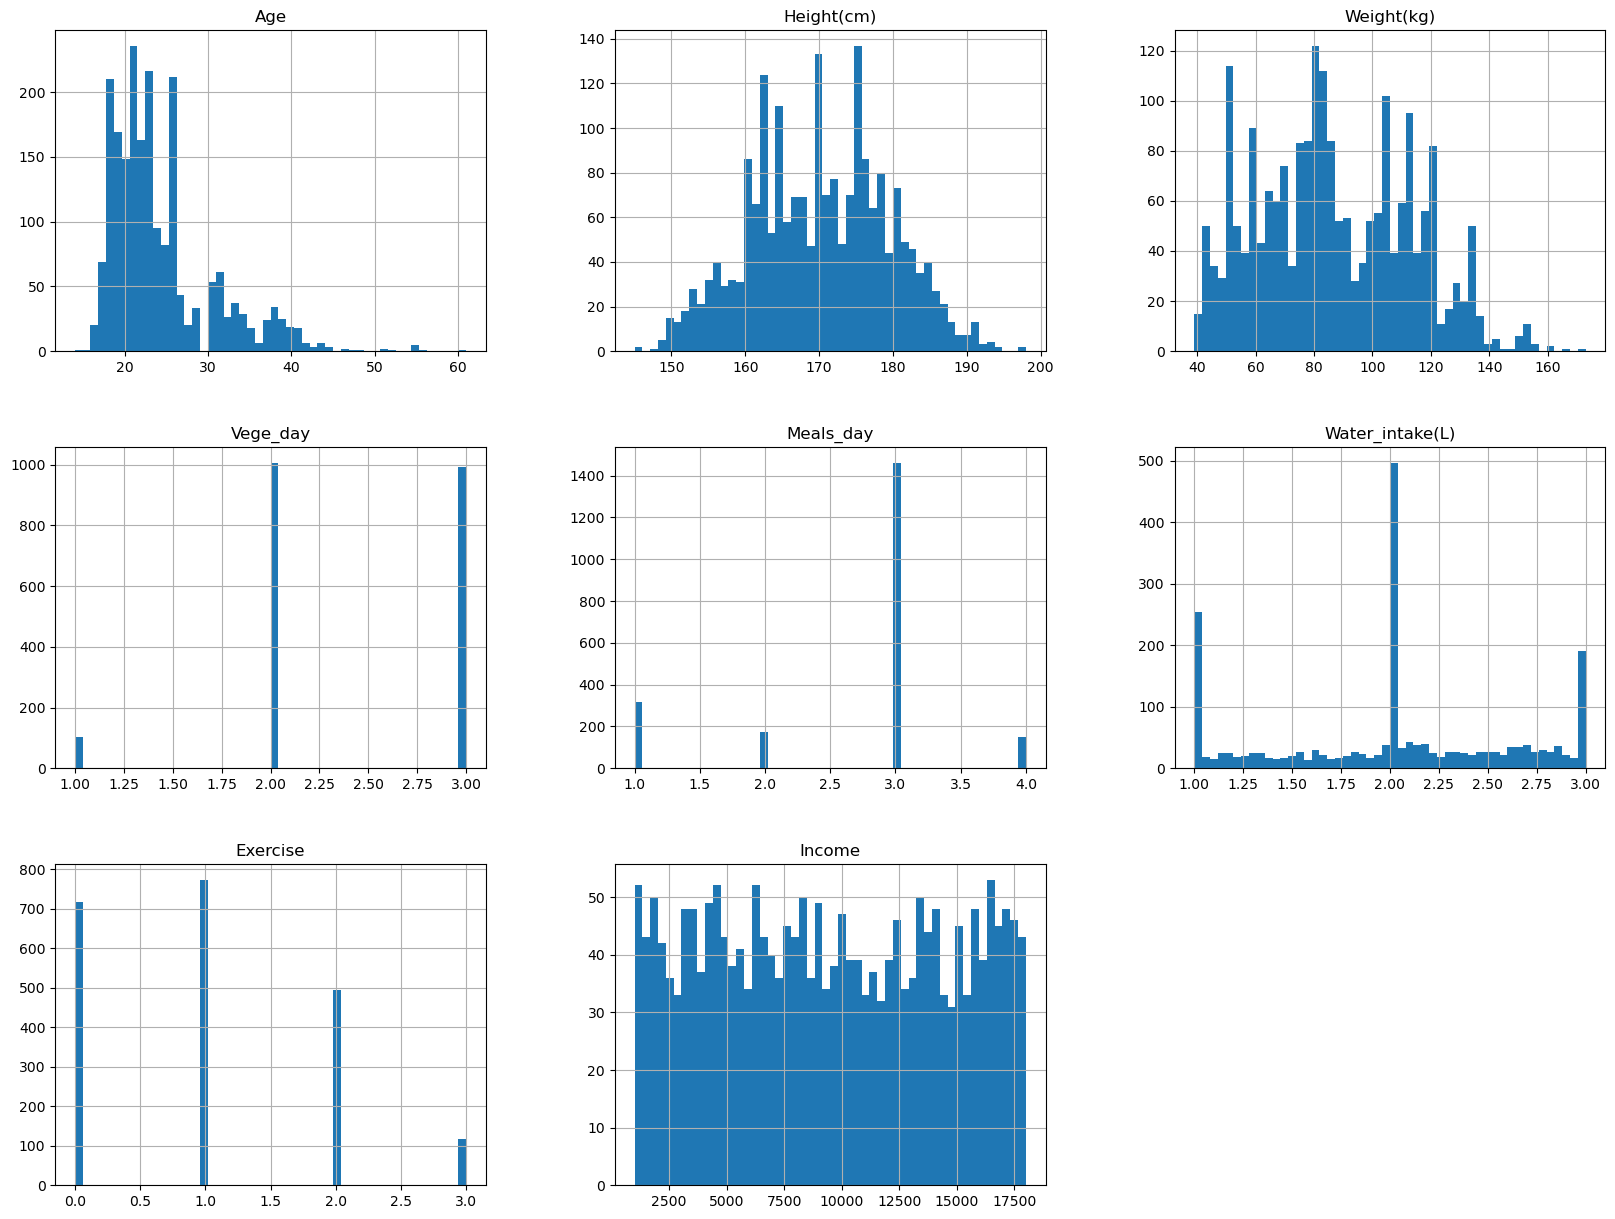

In [11]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Data Preprocessing

### Split the dataset to training and testing

#### Seperate Output Vector from Input Matrix

In [13]:
X = data.drop(columns=['Cardiovascular_risk(y)']) #Drop the output vector
y = data['Cardiovascular_risk(y)']

#show the shape of input matrix and output vector
print ('Shape of original dataset, train:', data.shape)
print ('X: shape=', X.shape, 'type=', type(X))
print ('y: shape=', y.shape, 'type=', type(y))

Shape of original dataset, train: (2100, 18)
X: shape= (2100, 17) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (2100,) type= <class 'pandas.core.series.Series'>


#### Split the input matrix into numerical and categorical sets

In [15]:
#Seperate numerical and categorial
X_num  = X.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
X_cat  = X[['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline']]

#show the shape of numerical and categorial
print('X_num shape:', X_num.shape)
print('X_cat shape:', X_cat.shape)

#check again if there is missing value or not
print('Number of missing values for all columns:')
X_num.isnull().sum()

X_num shape: (2100, 8)
X_cat shape: (2100, 9)
Number of missing values for all columns:


Age                0
Height(cm)         0
Weight(kg)         0
Vege_day           0
Meals_day          0
Water_intake(L)    0
Exercise           0
Income             0
dtype: int64

### Preprocessing the data

In [17]:
# Preprocessing numerical values with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

# Seperate ordinal and nominal features for categorial features
X_cat_ordinal = X_cat[["Alcohol", "Snack", "TV",]]
X_cat_nominal = X_cat[["Gender", "Family_history", "Junk_food", "Smoking", "Transportation", "Discipline"]]

# Preprocessing with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output = False)
X_cat_nominal = one_hot_encoder.fit_transform(X_cat_nominal)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_cat_ordinal = X_cat_ordinal.apply(lambda item: label_encoder.fit_transform(item), axis = 0)
y = label_encoder.fit_transform(y)

# Combine the features back
X = np.hstack([X_num, X_cat_nominal, X_cat_ordinal])

### Split the dataset into training and testing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print("Shape of X for Training:", X_train.shape)
print("Shape of X for Testing:", X_test.shape)
print("Shape of Y for Training:", y_train.shape)
print("Shape of Y for Testing:", y_test.shape)

Shape of X for Training: (1680, 26)
Shape of X for Testing: (420, 26)
Shape of Y for Training: (1680,)
Shape of Y for Testing: (420,)


## DecisionTree Training and Testing

In [21]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree with hyperparameters
DecisionTree = DecisionTreeClassifier(max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

### Validate the Performance


In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training set
cv_scores = cross_val_score(DecisionTree, X_train, y_train, cv=5, scoring='accuracy')

# Predict on the training set with the trained model
y_train_pred = DecisionTree.predict(X_train)

# Predict on the test set with the trained model
y_test_pred = DecisionTree.predict(X_test)

# Validate the model's performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred, target_names=label_encoder.classes_)

# Validate the model's performance on the test set
final_accuracy = accuracy_score(y_test, y_test_pred)
final_conf_matrix = confusion_matrix(y_test, y_test_pred)
final_class_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

# Displaying the reustls
print('Cross-validation accuracy scores: ', cv_scores)
print('Mean cross-validation accuracy: ', np.mean(cv_scores))
print()
print('Training set accuracy score: ', train_accuracy)
print()
print('Training set confusion matrix:')
print(train_conf_matrix)
print()
print('Training set classification report:')
print(train_class_report)
print()
print('Test set accuracy score: ', final_accuracy)
print()
print('Test set confusion matrix:')
print(final_conf_matrix)
print()
print('Test set classification report:')
print(final_class_report)

Cross-validation accuracy scores:  [0.95833333 0.9702381  0.9702381  0.96428571 0.9702381 ]
Mean cross-validation accuracy:  0.9666666666666666

Training set accuracy score:  0.9928571428571429

Training set confusion matrix:
[[787   0   0]
 [  0 438   1]
 [  3   8 443]]

Training set classification report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       787
         low       0.98      1.00      0.99       439
      medium       1.00      0.98      0.99       454

    accuracy                           0.99      1680
   macro avg       0.99      0.99      0.99      1680
weighted avg       0.99      0.99      0.99      1680


Test set accuracy score:  0.9595238095238096

Test set confusion matrix:
[[177   1   2]
 [  0 112   6]
 [  2   6 114]]

Test set classification report:
              precision    recall  f1-score   support

        high       0.99      0.98      0.99       180
         low       0.94      0.95      0.95     

## Visualizing The Performance

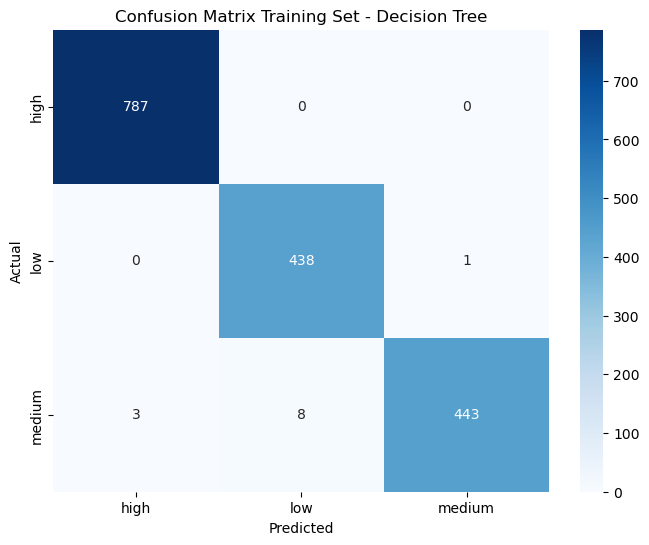

Number of Misclassifications: 12


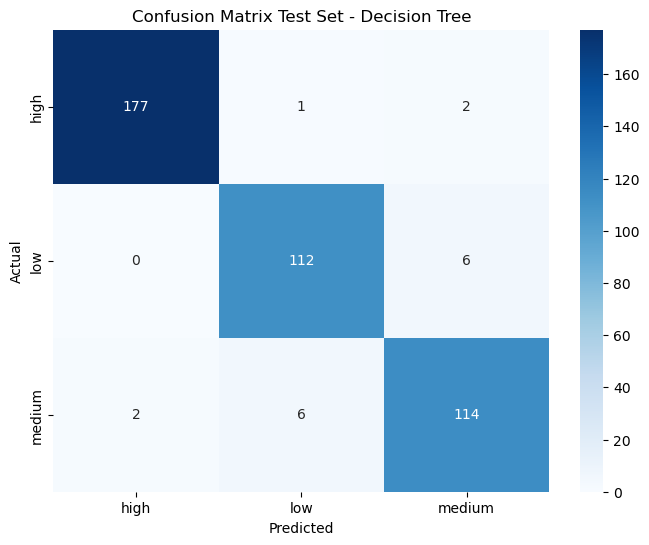

Number of Misclassifications: 17


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a confusion matrix heatmap for training set
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Training Set - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
num_misclassifications = np.sum(train_conf_matrix) - np.trace(train_conf_matrix)

print(f"Number of Misclassifications (Training Set): {num_misclassifications}")

# Create a confusion matrix heatmap for test set
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Test Set - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
num_misclassifications = np.sum(final_conf_matrix) - np.trace(final_conf_matrix)

print(f"Number of Misclassifications (Testing Set): {num_misclassifications}")

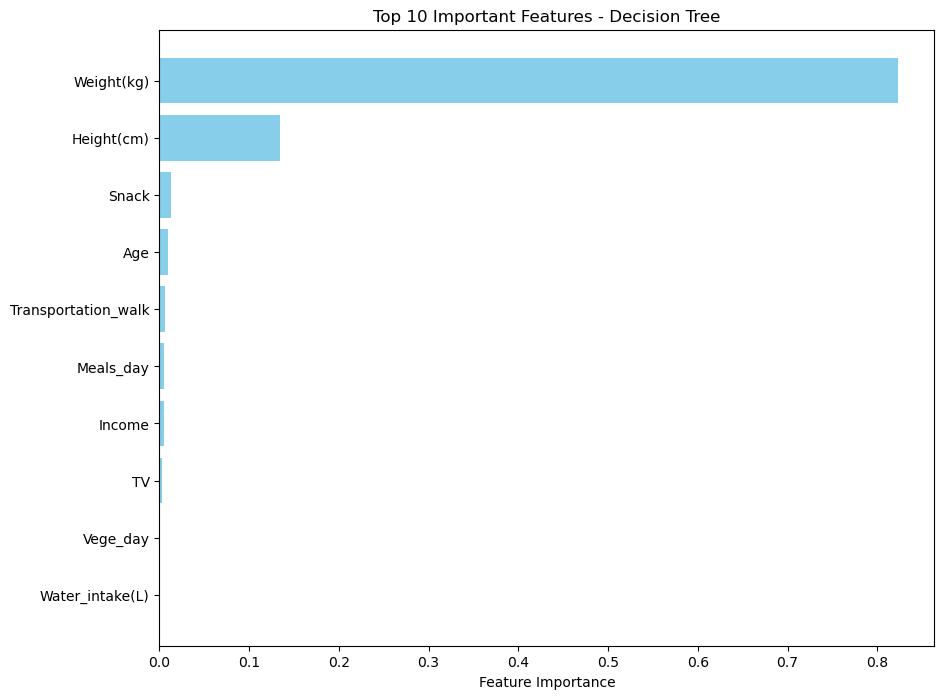

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Assuming you have the following feature names
# Replace these with actual feature names if you have them
numerical_feature_names = ['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Meals_day', 'Water_intake(L)', 'Exercise', 'Income']
categorical_feature_names = one_hot_encoder.get_feature_names_out()  # Get feature names from one-hot encoder
ordinal_feature_names = X_cat_ordinal.columns.tolist()  # Assuming these are columns in X_cat_ordinal

# Combine all feature names
all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names, ordinal_feature_names])

# Get feature importances from the Decision Tree model
feature_importances = DecisionTree.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = all_feature_names[sorted_indices]

# Plot the top 10 features
plt.figure(figsize=(10, 8))
plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features - Decision Tree")
plt.gca().invert_yaxis()
plt.show()
